## 6.5 Machine Learning Part 2

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\abdul\CareerFoundry-Assignment-06'

In [4]:
df = pd.read_csv(os.path.join(path, '02-Data', 'Prepared-Data', 'airport_clean_updated_62.csv'))

In [5]:
df.shape

(3594452, 23)

In [6]:
df.head()

,Unnamed: 0,Index,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,...,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long,Fly_year,Fly_month,Fly_day,Fly_year_month,Distance_Category,Fly_year_Category
0,0,1,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103,...,44.124599,-123.211998,44.254101,-121.150002,1990,11,1,1990-11,Short Distance,1990-1994
1,1,2,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103,...,44.124599,-123.211998,44.254101,-121.150002,1990,12,1,1990-12,Short Distance,1990-1994
2,2,3,EUG,RDM,"Eugene, OR","Bend, OR",11,72,4,103,...,44.124599,-123.211998,44.254101,-121.150002,1990,10,1,1990-10,Short Distance,1990-1994
3,3,4,MFR,RDM,"Medford, OR","Bend, OR",0,18,1,156,...,42.374199,-122.873001,44.254101,-121.150002,1990,2,1,1990-02,Short Distance,1990-1994
4,4,5,MFR,RDM,"Medford, OR","Bend, OR",11,18,1,156,...,42.374199,-122.873001,44.254101,-121.150002,1990,3,1,1990-03,Short Distance,1990-1994


In [7]:
# Select only entries with a non-zero rating

df = df[df['Passengers'] >0]

In [8]:
# Select only entries with a non-zero rating

df = df[df['Seats'] >0]

In [9]:
# Select only entries with a non-zero rating

df = df[df['Flights'] >0]

In [10]:
# Select only entries with a non-zero rating

df = df[df['Distance'] >0]

In [11]:
df.shape

(3211097, 23)

In [12]:
# Need to remove any categorical columns from your data.
df1=df[['Passengers','Seats','Flights','Distance']]

### 2. The elbow technique

In [13]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [14]:
score = [kmeans[i].fit(df1).score(df1) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-197550371755108.7,
 -85300051796264.05,
 -47453789522084.57,
 -30630186216487.117,
 -21260174181485.6,
 -15578166491979.06,
 -12365672758689.74,
 -10437579537095.496,
 -9145337976462.133]

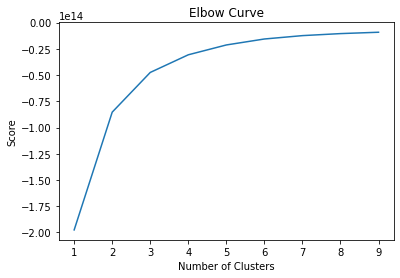

In [15]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there's a large jump from two to four on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is four.

### 3. k-means clustering

In [16]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4, n_jobs = -1) 

In [17]:
#### Fit the k-means object to the data.

kmeans.fit(df1)

C:\Users\abdul\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=-1)

In [18]:
df1['clusters'] = kmeans.fit_predict(df1)

C:\Users\abdul\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\abdul\AppData\Local\Temp/ipykernel_19212/865444660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['clusters'] = kmeans.fit_predict(df1)


In [19]:
df1.head()

,Passengers,Seats,Flights,Distance,clusters
0,41,396,22,103,3
1,88,342,19,103,3
2,11,72,4,103,3
4,11,18,1,156,3
5,2,72,4,156,3


In [20]:
df1['clusters'].value_counts()

3    2195915
0     791255
1     198055
2      25872
Name: clusters, dtype: int64

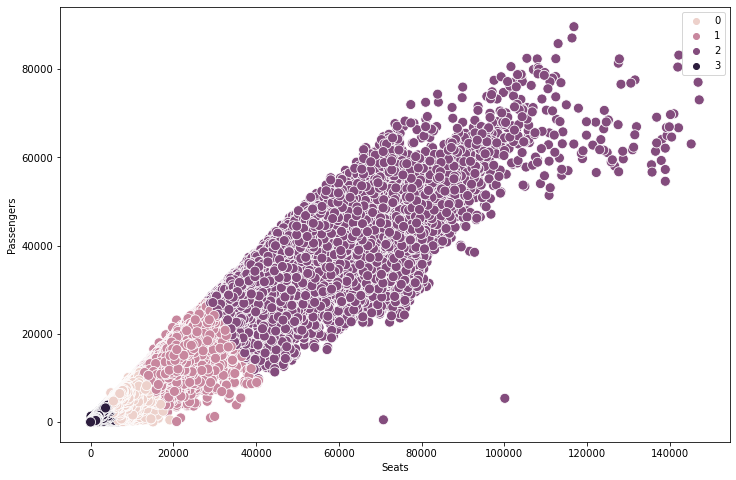

In [21]:
# Plot the clusters for the "Seats" and "Passengers" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['Seats'], y=df1['Passengers'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Seats') # Label x-axis.
plt.ylabel('Passengers') # Label y-axis.
plt.show()

#### -Cluster with number '0' Reprasents that less seats and less number of passengers. Cluster with number '1', which has seats from 20000 to 40000 and passengers are from 12000-30000. Cluster with number '2' has seats from 5000-20000 and passengers from 3000-12000. Cluster with number '3' , which has seats from 40000-150000 and passsengers from 30000-90000. 
#### -This shows that Based on the number of seats passengers will depend. This means for few seats only less number of flights are sufficients. when the Passengers increases Seats are also increasing means number of flights are also increasing.
#### -For lesser passengers only single asile flights are sufficeints. for incresed passengers require more seats means large seating capacity fllights are require to operate. 

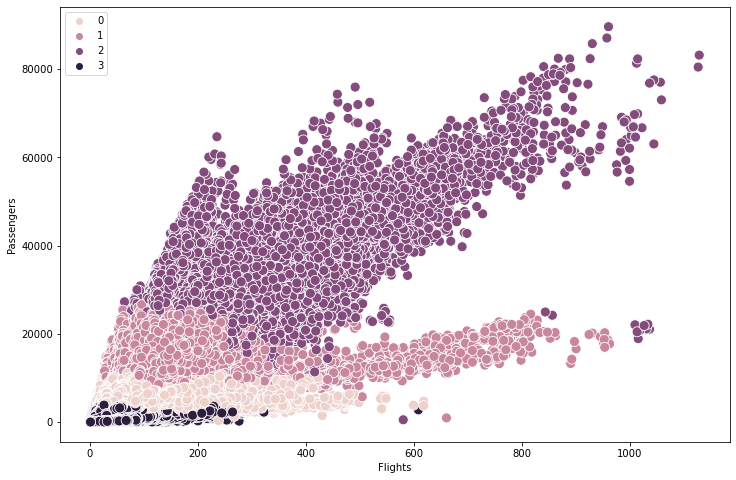

In [22]:
# Plot the clusters for the "Flights" and "Passengers" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['Flights'], y=df1['Passengers'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Flights') # Label x-axis.
plt.ylabel('Passengers') # Label y-axis.
plt.show()

#### -For lesser passengers only single asile flights are sufficeints. for incresed passengers require more seats means large seating capacity fllights are require to operate. 
#### -Upto 200 flights(Cluster number '0') there are only few passengers. 
#### -Upto 500 flights(Cluster number '2') there are  passengers from 3000-10000. 
#### -Upto 900 flights(Cluster number '1') there are  passengers from 10000-22000. In this cluster people used more flights that means they used short distance travell or small seating capacity flights. 
#### -Upto 1100 flights(Cluster number '3') there are  passengers from 22000-90000. In this cluster many people used 400 flights that means they used Large seating capacity flights.


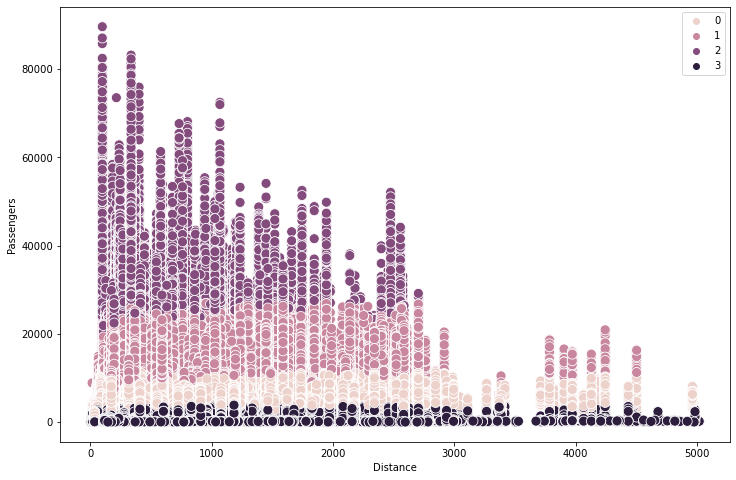

In [23]:
# Plot the clusters for the "Distance" and "Passengers" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['Distance'], y=df1['Passengers'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Distance') # Label x-axis.
plt.ylabel('Passengers') # Label y-axis.
plt.show()

#### -Cluster number '3' Passengers travelled Up to maximumof 260 miles only. but the Other clusters '0', '1', '2' are travelled up to 5000 miles. 
#### - Why this CLuster number '3' passengers only travelled 260 miles need to further investigate? 


In [24]:
df1.loc[df1['clusters'] == 3, 'cluster'] = 'Black'
df1.loc[df1['clusters'] == 2, 'cluster'] = 'dark purple'
df1.loc[df1['clusters'] == 1, 'cluster'] = 'purple'
df1.loc[df1['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\abdul\AppData\Local\Temp/ipykernel_19212/937771554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[df1['clusters'] == 3, 'cluster'] = 'Black'


In [25]:
df1.head()

,Passengers,Seats,Flights,Distance,clusters,cluster
0,41,396,22,103,3,Black
1,88,342,19,103,3,Black
2,11,72,4,103,3,Black
4,11,18,1,156,3,Black
5,2,72,4,156,3,Black


In [26]:
df1.groupby('cluster').agg({'Passengers':['mean', 'median'], 
                         'Seats':['mean', 'median'], 
                         'Flights':['mean', 'median'],
                          'Distance':['mean', 'median']})

Passengers                  Seats              Flights         \
                     mean   median          mean   median        mean median   
cluster                                                                        
Black          953.763405    521.0   1560.979860    920.0   19.606664    9.0   
dark purple  31204.127280  28657.0  45121.623531  40138.0  303.278370  272.0   
pink          5243.918720   4871.0   7892.086105   7564.0   68.066204   60.0   
purple       13349.784474  12518.0  18914.854384  17514.0  129.863205  121.0   

               Distance         
                   mean median  
cluster                         
Black        623.015830  475.0  
dark purple  683.495903  414.0  
pink         820.943601  612.0  
purple       870.204782  670.0

#### - Cluster Pink passengers are the least number of passengers but they travell more distance than the cluster Black Passengers. 
#### -The Reason for this need to find.
#### - Cluster Black Passengers are the Least distance travellers. Need to find the reason for this?
#### - Cluster Black Passengers require Highest seats and Hiest number of flights than others. Need to find the reason for this?

KeyboardInterrupt: 

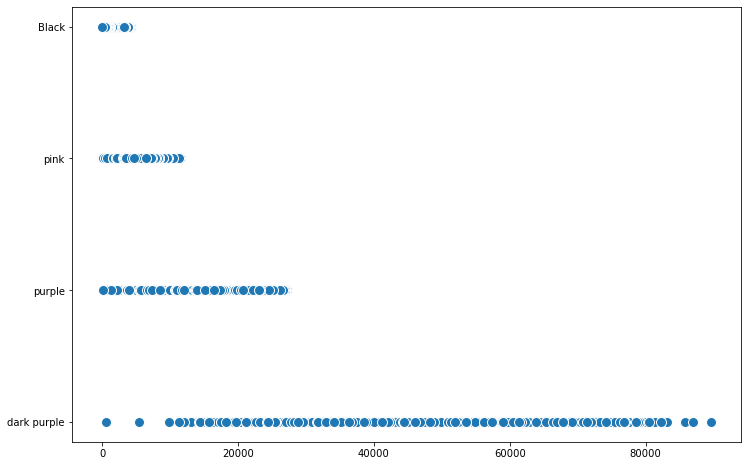

In [32]:
# Plot the clusters for the "Distance" and "Passengers" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(y=df1['cluster'], x=df1['Passengers'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.ylabel('cluster') # Label x-axis.
plt.xlabel('Passengers') # Label y-axis.
plt.show()